# Project: Investigate a Dataset - No Show Appointments Kaggle

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#wrangling">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The No-show appointments dataset is from Kaggle. It contains information about 100k medical appointments in Brazil and whether the patients show up for their appointment. The following are the various characteristics we can find in the dataset:
|No. | Column | Description |
|----| -------| ------------ |
| 1 | PatientId | Patient identification number |
| 2 | AppointmentID | Appointment number assigned |
| 3 | Gender | Gender of the patient | 
| 4 | ScheduledDay | The date on which the patient set up their appointment |
| 5 | AppointmentDay | The date of the appointment |
| 6 | Age | Age of the patient |
| 7 | Neighbourhood | Location of the hospital |
| 8 | Scholarship | If the patient is enrolled in the Brasilian welfare program Bolsa Familia, marked 1 otherwise marked 0 |
| 9 | Hipertension | If the patient has Hypertension, marked 1 otherwise 0 |
| 10 | Diabetes | If the patient is suffering from diabetes, marked 1 otherwise 0 |
| 11 | Alcoholism | If the patient is suffering from alcoholism, marked 1 otherwise 0 |
| 12 | Handcap | If the patient is handicapped, marked 1 otherwise 0 |
| 13 | SMS_received | If the patient received an SMS reminder marked 1 otherwise 0 |
| 14 | No-show | If the patient did not show up, marked 1 otherwise 0 |

In this data analysis, I plan to explore the following questions : 
1. Are there any particular day of the week with maximum no-shows?
2. How long before the appointment day should the appointment be scheduled to avoid no-show?
3. Which are the neighbourhoods with most No-shows?
4. Does having a scholarship improve the show-up rate? 
5. Do any pre-ailments (Hypertension, Diabetes, and alcoholism) contribute to the no-show)?
6. Do SMS reminders help?

Following are some modules I use in the analysis:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

First, I am loading the dataset into a dataframe using pandas. 

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I then check for the number of rows and columns using .shape attribute

In [4]:
df.shape

(110527, 14)

I find that there are 110527 rows and 14 columns in the dataset. I get a general overview of the data using .describe() function.

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


For a general summary, I only find Age and Handcap columns to be useful. PatientID and AppointmentID do not add anything to the analysis. I also find that the Scholarship, Hipertension, Diabetes, Alchoholism and SMS_received columns are dummies with values represented in 0 and 1 corresponding to "No" and "Yes". 

<a id='cleaning'></a>
### Data Cleaning 
Here I check for missing values, data type inconsistencies and duplicates in the dataset. I use .info() method to check for datatypes and to find out which columns contain null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Based on my results, I find no missing or null values. However, I find that the ScheduledDay and AppointmentDay are not of the "datetime" datatype. So I use `pd.to_datetime()` method to convert them to the appropriate datatype. 

In [7]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

Checking for the datatypes again, I find that all datatypes now match their contents. However, I want to make one last change. I want to rename the "No-show" column to "no_show" and convert the data in it to dummies, thus making it an `int64` datatype column.

In [9]:
df.rename(columns={"No-show": "no_show"}, inplace=True)

In [10]:
df['no_show'] = df['no_show'].replace('Yes', 1)
df['no_show'] = df['no_show'].replace('No', 0)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0


In [11]:
df.groupby('no_show').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
no_show,,,,,,,,,,,,,
0,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208
1,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319


I find that all the rows of the "no_show" column have been converted to 0s and 1s. Now, I am making one final check of the datatypes:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  no_show       

The datatypes now look good. So I check for the duplicates using the "AppointmentID". I do not use PatientId because a single patient can make multiple appointments. 

In [13]:
df[df.duplicated(subset=['AppointmentID'])]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show


I find no duplicates in the dataset. 

I will still keep PatientId and AppointmentID so that I do not accidentally remove rows as I do my analysis. 
Lastly, I will not be using the 'HandCap' column as i couldn't find appropriate information about it. So I will drop this column. 

In [14]:
df.drop(columns='Handcap', inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

The data is now clean. So I start exploring it in this section.

### Question 1: Is there any one day where patients do not show up?

First thing I want to know is whether there is a day when the most appointments were cancelled. For that, I extracted the `day_of_week` from the AppointmentDay and ScheduledDay and plot their histograms of the proportion of no-shows to the total appointments on the day to understand the trends. 

I found this link useful: https://www.geeksforgeeks.org/get-day-from-date-in-pandas-python/

In [15]:
# df.groupby('AppointmentDay').nunique()
df['AppointmentDay_ofweek'] = df['AppointmentDay'].dt.day_of_week
df['ScheduledDay_ofweek'] = df['ScheduledDay'].dt.day_of_week

In [16]:
df['ScheduledDay_ofweek'].replace([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], inplace=True)
df['AppointmentDay_ofweek'].replace([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], inplace=True)

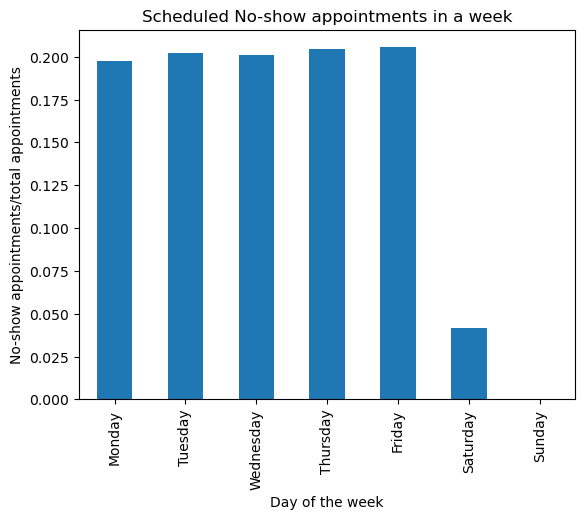

In [17]:
days_of_week=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sched_totals = df.groupby('ScheduledDay_ofweek').AppointmentID.count().reindex(days_of_week)
sched_count = df.query('no_show == 1').groupby('ScheduledDay_ofweek').AppointmentID.count().reindex(days_of_week)#.plot(kind='bar')#, use_index=False, xticks=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sched_proportions = sched_count/sched_totals
sched_proportions.plot(kind='bar', xlabel='Day of the week', ylabel='No-show appointments/total appointments',
 title="Scheduled No-show appointments in a week");

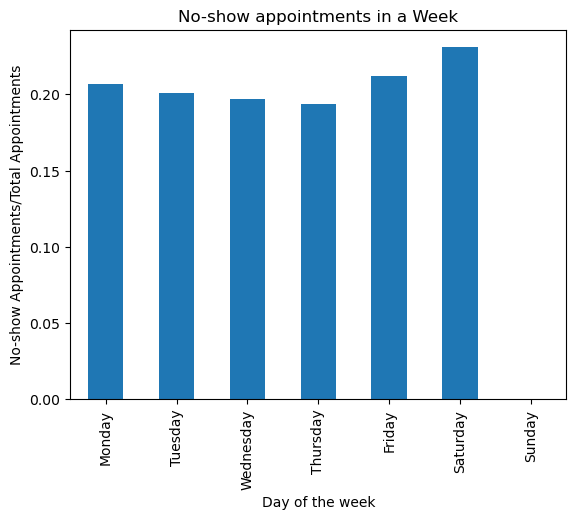

In [18]:
days_of_week=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
appt_totals = df.groupby('AppointmentDay_ofweek').AppointmentID.count().reindex(days_of_week)
appt_count = df.query('no_show == 1').groupby('AppointmentDay_ofweek').AppointmentID.count().reindex(days_of_week)#.plot(kind='bar')#, use_index=False, xticks=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
appt_proportions = appt_count/appt_totals
appt_proportions.plot(kind='bar', xlabel='Day of the week', ylabel='No-show Appointments/Total Appointments', title='No-show appointments in a Week');

I find that most people do not show up for appointments on a Saturday as compared to any other day.

### Question 2: How long before the appointment day should the appointment be scheduled to avoid no-show?

Next, I find out the number of days in between the Scheduled date and Appointment date to figure out if there is a correlation between them. I use help from the following stackoverflow page: 
https://stackoverflow.com/questions/22132525/add-column-with-number-of-days-between-dates-in-dataframe-pandas

In [19]:
df['days_inbetween'] = (df['AppointmentDay']-df['ScheduledDay']).dt.days + 1
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,no_show,AppointmentDay_ofweek,ScheduledDay_ofweek,days_inbetween
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Friday,Friday,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Friday,Friday,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Friday,Friday,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Friday,Friday,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Friday,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,1,0,Tuesday,Tuesday,35
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,1,0,Tuesday,Tuesday,35
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,1,0,Tuesday,Wednesday,41
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,1,0,Tuesday,Wednesday,41


In [20]:
df[['days_inbetween']].describe()

,days_inbetween
count,110527.000000
mean,10.183702
std,15.254996
min,-6.000000
25%,0.000000
50%,4.000000
75%,15.000000
max,179.000000


I set the days between the Scheduled and Appointment dates for the same day appointments to zero

In [21]:
df.loc[df['days_inbetween'] < 0, 'days_inbetween'] = 0

In [22]:
data = df[['days_inbetween', 'no_show']]
data
# plt.hist(data['days_inbetween'], bins=range(min(data['days_inbetween']), max(data['days_inbetween']) + 10, 10))#, weights=data['no_show']);

,days_inbetween,no_show
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
110522,35,0
110523,35,0
110524,41,0
110525,41,0


I then bin the data to compute the proportion of no-shows for the appointments in each bin.

In [23]:
# bin_width = 7
bins = np.arange(0, max(data['days_inbetween']/7))
proportions = []
# bins

for i in bins:
    count = 0
    count_noshows = 0
    for k, j in enumerate(data['days_inbetween']):
        if j in np.arange(7*i, (7*i)+7):
            count += 1
            if data['no_show'][k] == 1:
                count_noshows+= 1
    # print(i, count)
    proportions.append(count_noshows/count)



In [24]:
dict_freq = {
    'bins' : bins,
    'proportions': proportions
}

freq_dat = pd.DataFrame(dict_freq)
freq_dat

,bins,proportions
0,0.0,0.125442
1,1.0,0.289628
2,2.0,0.322285
3,3.0,0.339554
4,4.0,0.315299
5,5.0,0.354448
6,6.0,0.333841
7,7.0,0.337223
8,8.0,0.287140
9,9.0,0.303109


I then plot the proportion of no-shows as a function of the time between the scheduled and appointment dates. 

<AxesSubplot:xlabel='Number of Weeks from the Schedule date', ylabel='No-show/Total appointments'>

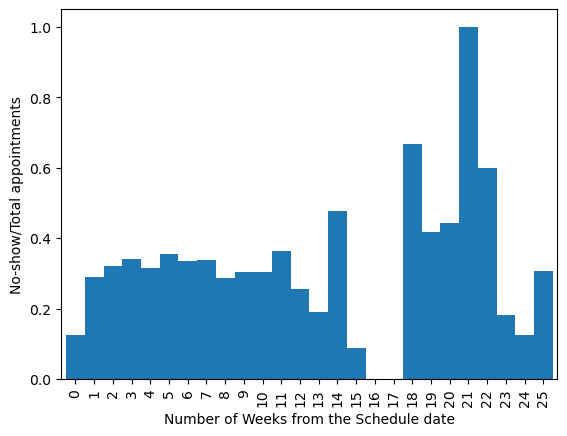

In [25]:
freq_dat['proportions'].plot(kind='bar', width=1, xlabel='Number of Weeks from the Schedule date', ylabel='No-show/Total appointments')

I find that when the appointments are missed the most when they are scheduled ~3 weeks in advance.

### Question 3: Which are the neighbourhoods with most No-shows?

The next thing to inspect are which neighbourhoods have the most no-shows. 

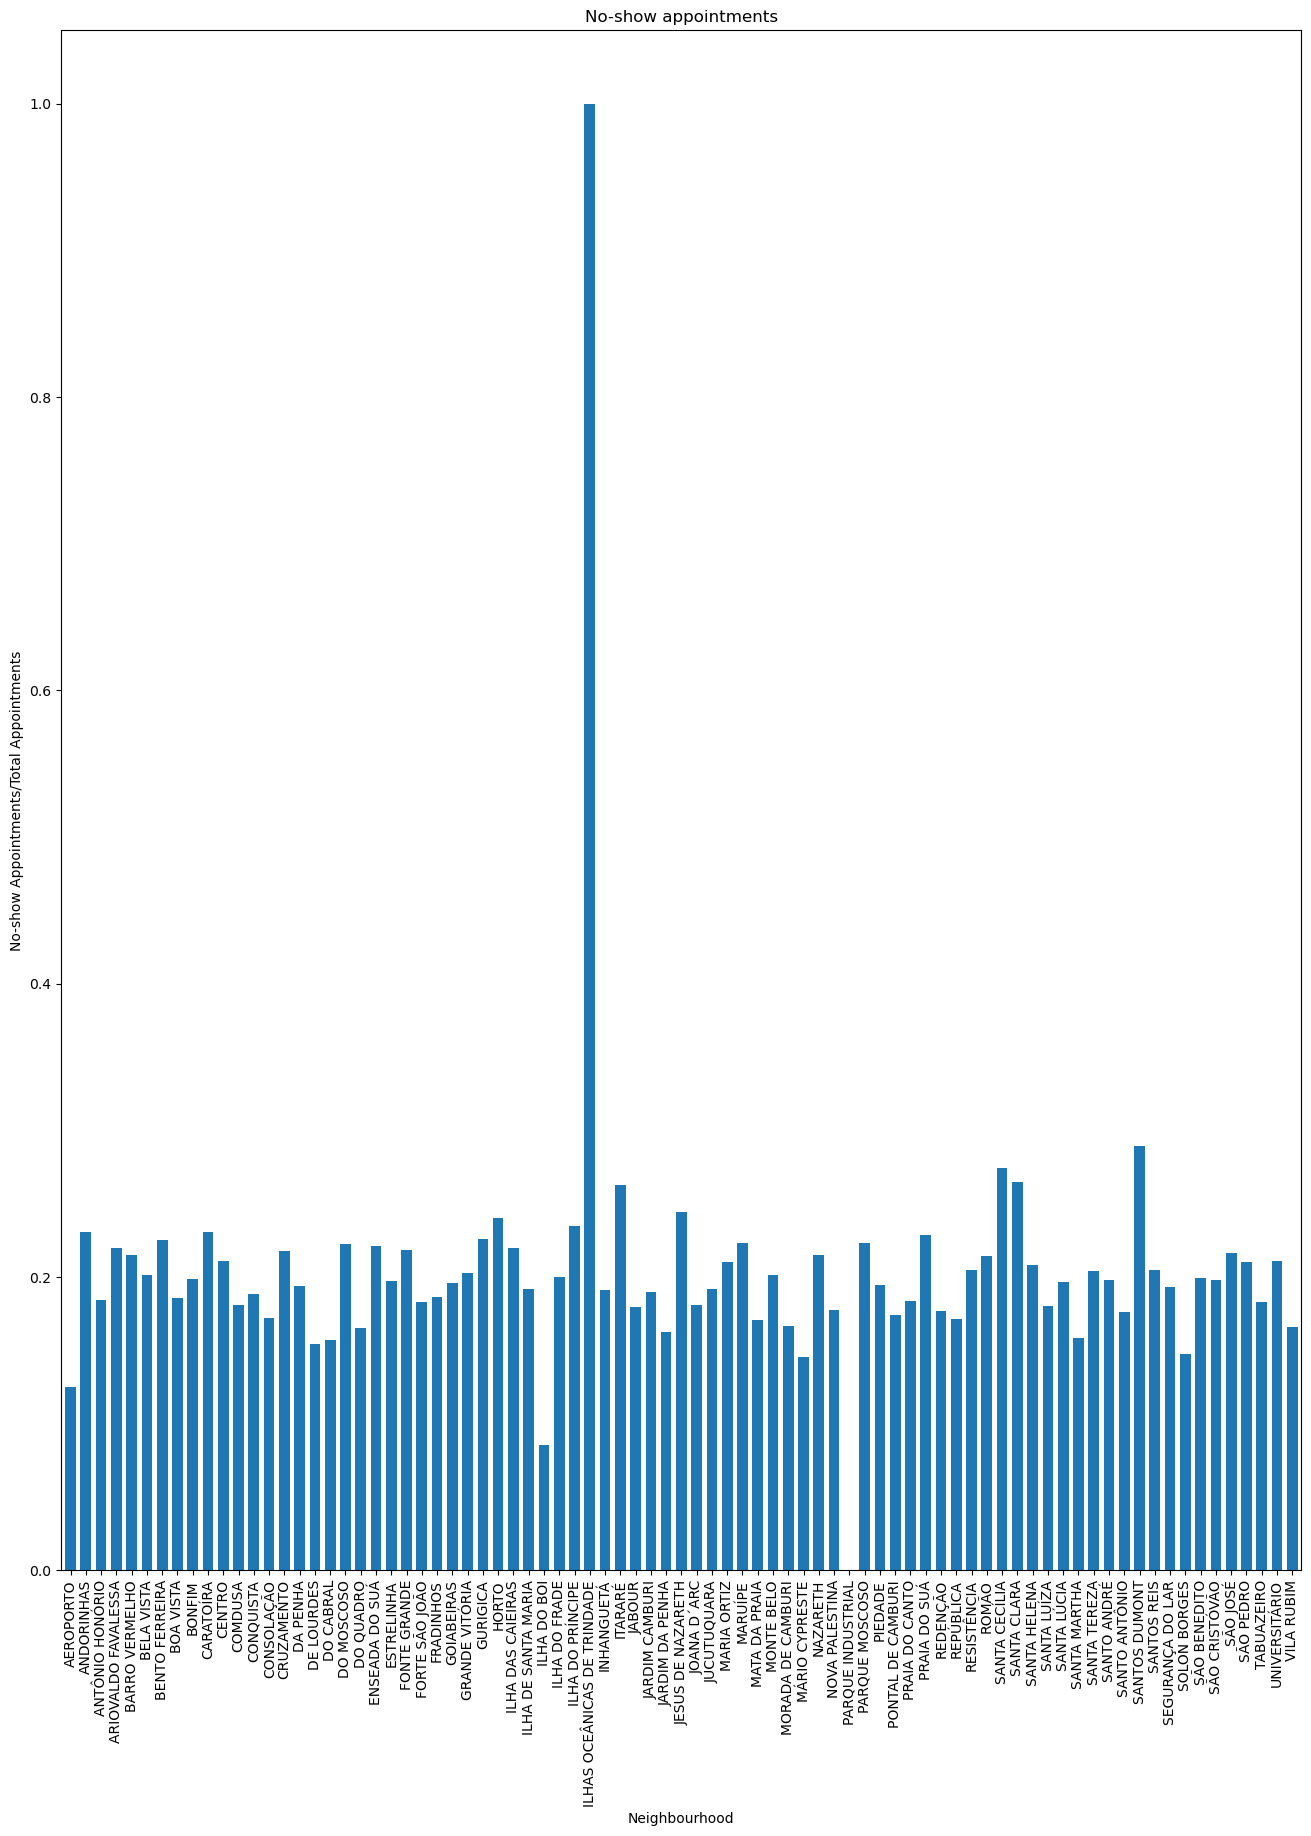

In [26]:
# days_of_week=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
appt_totals = df.groupby('Neighbourhood').AppointmentID.count()#.reindex(days_of_week)
appt_count = df.query('no_show == 1').groupby('Neighbourhood').AppointmentID.count()#.reindex(days_of_week)#.plot(kind='bar')#, use_index=False, xticks=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
appt_proportions = appt_count/appt_totals
appt_proportions.plot(kind='bar', xlabel='Neighbourhood', width=0.7, ylabel='No-show Appointments/Total Appointments', title='No-show appointments', figsize=[16,20]);

I find that the no-show rate is highest for ILHAS OCEANICAS DE TRINDADE while no-shows were registed in PARQUE INDUSTRIAL region. 

### Question 4: Does having a scholarship improve the show-up rate? 

I wanted to check if having a scholarship improves the show-up rate. 

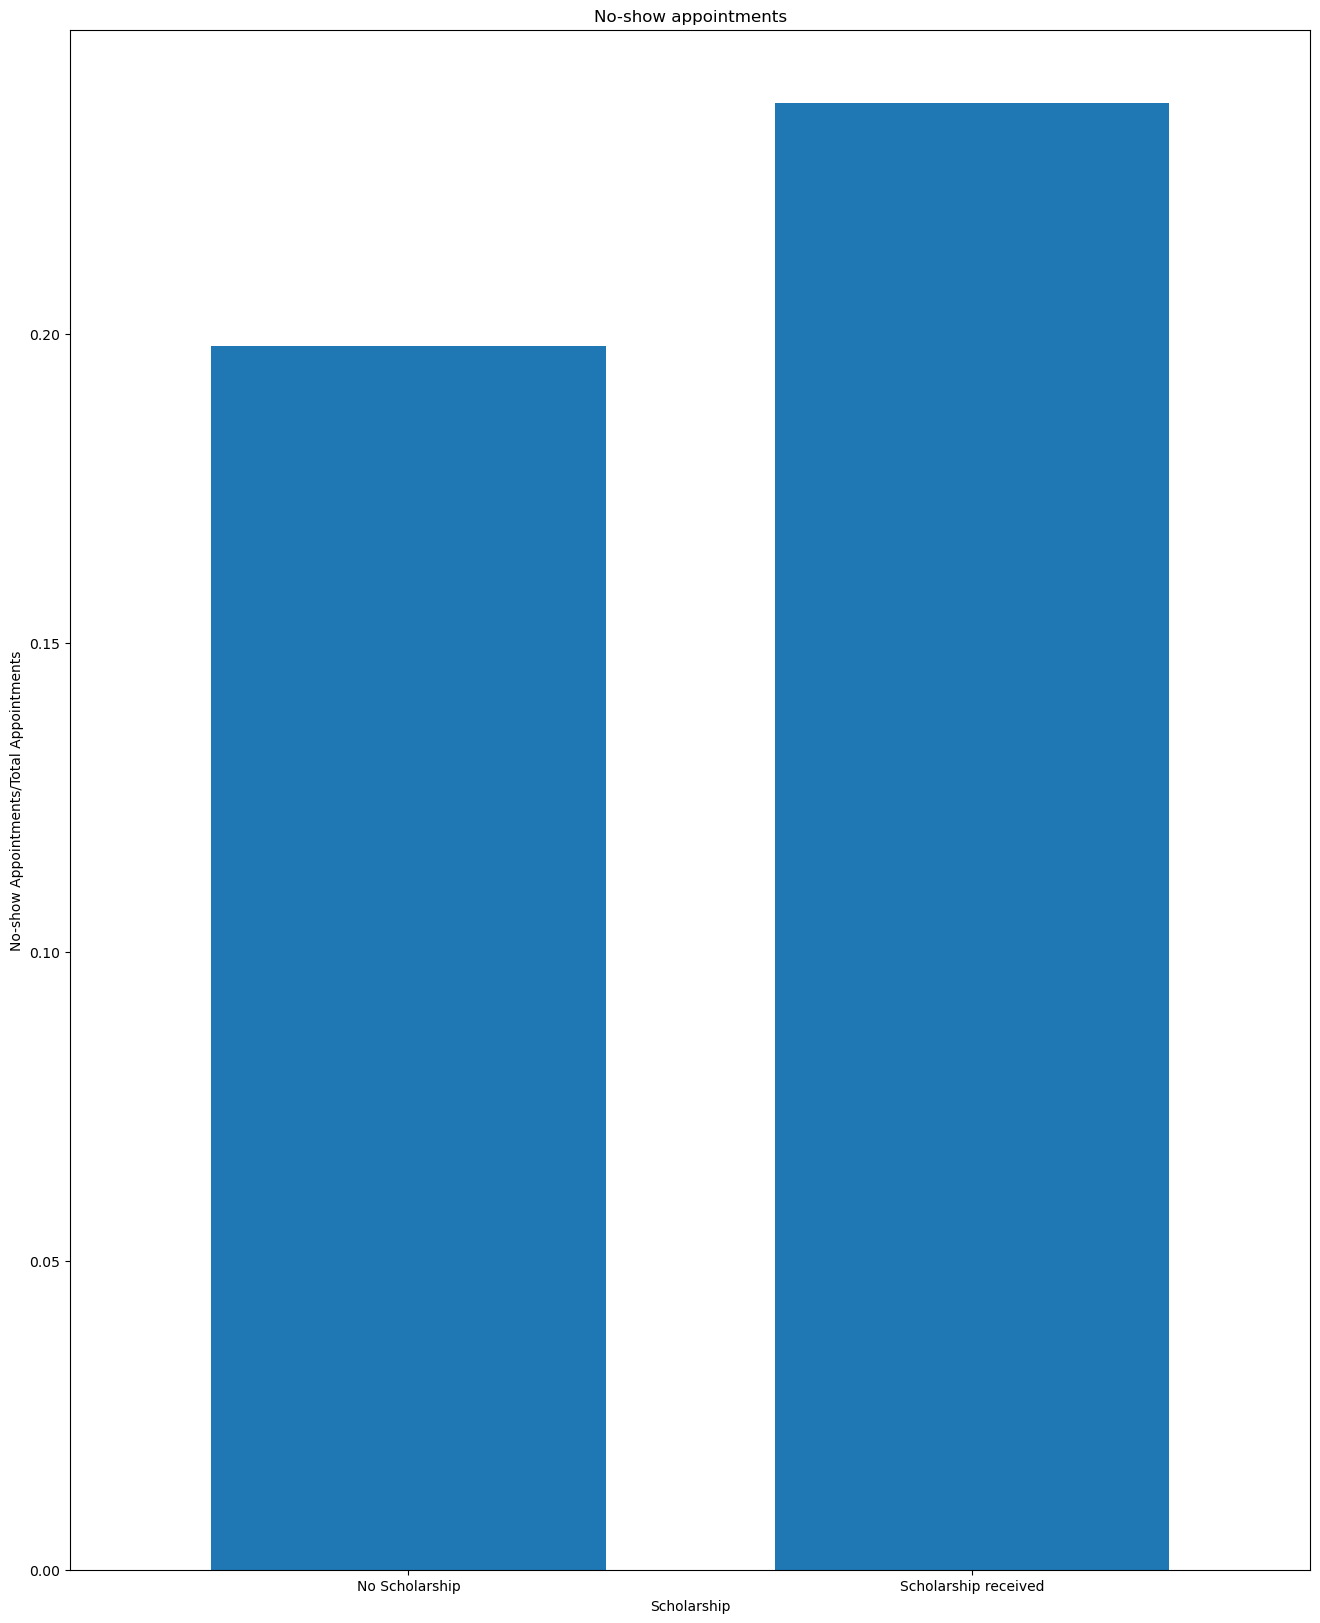

In [27]:
# days_of_week=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
appt_totals = df.groupby('Scholarship').AppointmentID.count()#.reindex(days_of_week)
appt_count = df.query('no_show == 1').groupby('Scholarship').AppointmentID.count()#.reindex(days_of_week)#.plot(kind='bar')#, use_index=False, xticks=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
appt_proportions = appt_count/appt_totals
ax = appt_proportions.plot(kind='bar', xlabel='Scholarship', width=0.7, ylabel='No-show Appointments/Total Appointments',
 title='No-show appointments', figsize=[16,20], rot=0);
ax.set_xticklabels (['No Scholarship', 'Scholarship received']);

I find that the patients with scholarships tend to not show up more than those without scholarship.

### Question 5: Do any pre-ailments (Hypertension, Diabetes, and alcoholism) contribute to the no-show)?

Here I check if any preceding ailments affect the appointments, starting with Hypertension.

For this, I write a function to plot the histograms for no-show proportions.

In [28]:
def plot_hist(column_name, labels = [], no_show=1):
    appt_totals = df.groupby(column_name).AppointmentID.count()#.reindex(days_of_week)
    appt_count = df.query(f'no_show == {no_show}').groupby(column_name).AppointmentID.count()#.reindex(days_of_week)#.plot(kind='bar')#, use_index=False, xticks=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    appt_proportions = appt_count/appt_totals
    ax = appt_proportions.plot(kind='bar', xlabel=column_name, width=0.7, ylabel='No-show Appointments/Total Appointments',
    title='No-show appointments', figsize=[8,8], rot=0);
    if len(labels) >0:
        ax.set_xticklabels ([labels[0], labels[1]]);

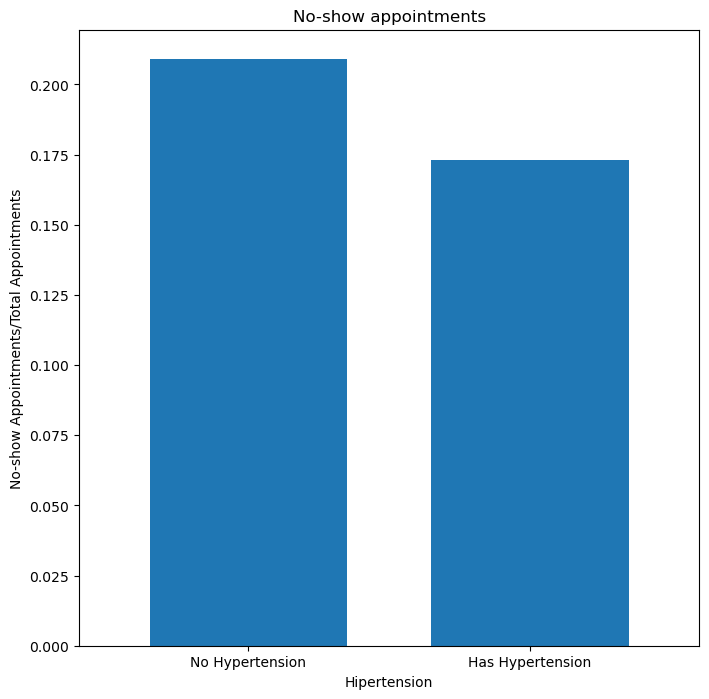

In [29]:
plot_hist(column_name='Hipertension', labels={0:'No Hypertension', 1:'Has Hypertension'})

I find people with no hypertension miss their appointment more than those who have it.

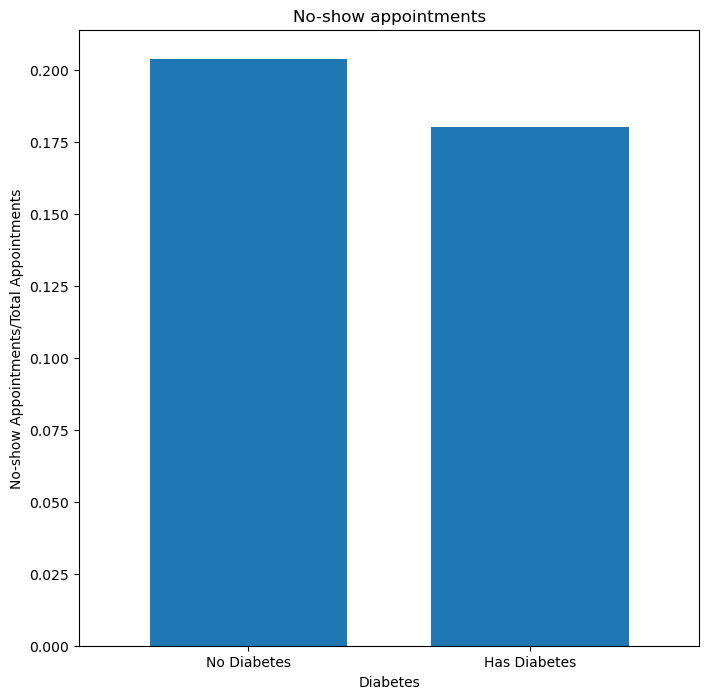

In [30]:
plot_hist(column_name='Diabetes', labels={0:'No Diabetes', 1:'Has Diabetes'})

Similarly, those who do not have diabetes show up less for their appointments compared to those who do

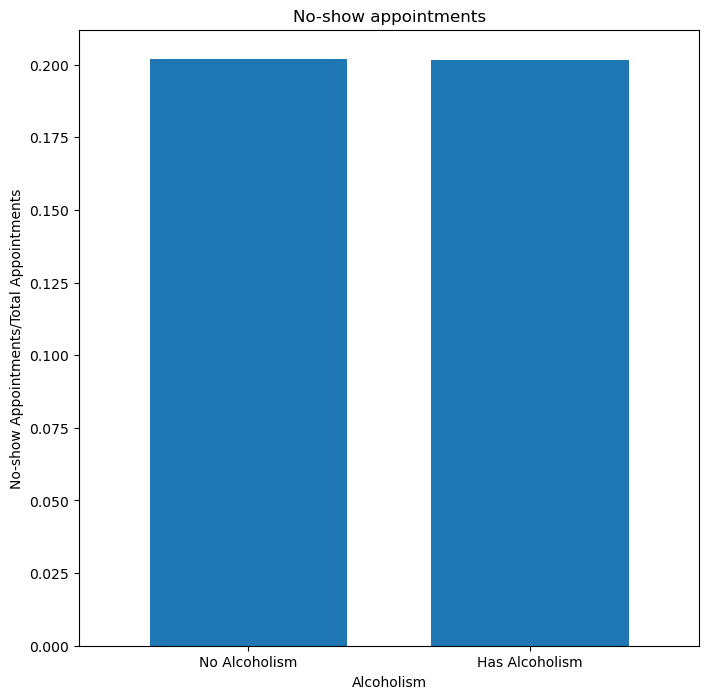

In [31]:
plot_hist(column_name='Alcoholism', labels={0:'No Alcoholism', 1:'Has Alcoholism'})

Alcoholism doesn't seem to have an affect on the no-show rate.

### Question 6: Do SMS reminders help?

Lastly, I check if SMS reminders help with the no-show rate.

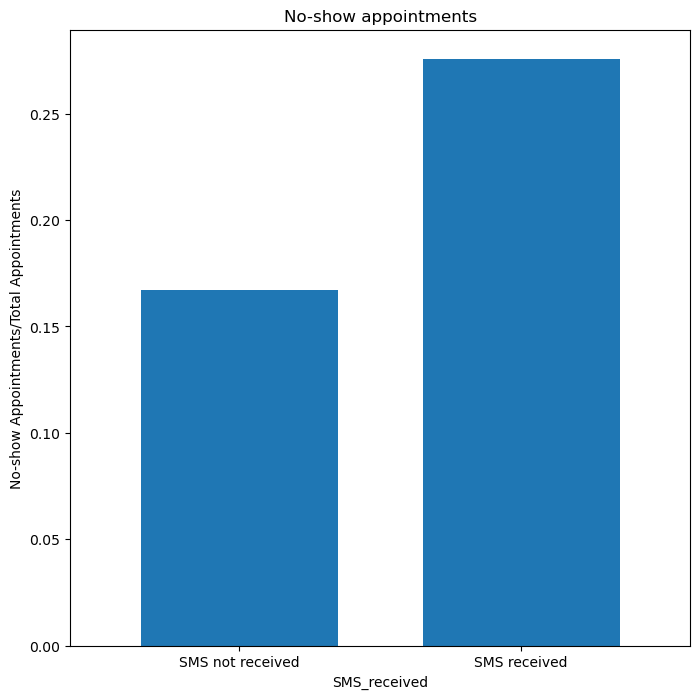

In [32]:
plot_hist(column_name='SMS_received', labels={0:'SMS not received', 1:'SMS received'})
# df.columns

However, I found that people who received the SMS alerts tend to not show up for their appointments more compared to those who do not.

<a id='conclusions'></a>
## Conclusions

Based on my analysis, I find the following:
1. Patients don't tend to show up more for appointments on a Saturday
2. Patients don't tend to show up most for appointments scheduled three weeks before the appointment date.
3. The no-show rate is highest for ILHAS OCEANICAS DE TRINDADE while no-shows were registed in PARQUE INDUSTRIAL region. 
4. Those with scholarships show up slightly less for their appointments.
5. Alcoholism has no impact on the no-show rate while patients without Hypertension and Diabetes show up less compared to theri counterparts.
6. Lastly, patients who do not receive SMS alerts show up more compared to those who do. 